#Object Detection for Security and Autonomous Systems


## **Objective**  
The goal of this project is to develop an **object detection model** using **Fastai** that can accurately classify images into **11 distinct categories**. This model will be useful for **security, surveillance, and autonomous systems**, where real-time object identification is crucial for decision-making.

## **Use Cases**  
- **Security & Surveillance**: Detecting humans, vehicles, and potential threats.  
- **Autonomous Vehicles**: Identifying obstacles like cars, trucks, and pedestrians.  
- **Aviation Safety**: Recognizing aircraft and airborne hazards like birds.  

## **Categories for Detection**  
- **Human**  
- **Airplane**  
- **Automobile**  
- **Bird**  
- **Cat**  
- **Deer**  
- **Dog**  
- **Frog**  
- **Horse**  
- **Ship**  
- **Truck**  

# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8  # Batch size for training

In [2]:
!pip install icrawler

In [3]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

# Importing Necessary Libraries

In [4]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!ls /content/drive/My\ Drive/

'DS PROJECTS'


In [13]:
%cd /content/drive/My Drive/DS PROJECTS/Object Detection for Security and Autonomous Systems

/content/drive/My Drive/DS PROJECTS/Object Detection for Security and Autonomous Systems


# Download Images from Browser

we are going to use **DuckDuckGo Image Search**. <br/>


In [ ]:
doc(search_images_ddg)

In [ ]:
doc(search_images_bing)

In [ ]:
# Define categories with highly specific and realistic search terms
categories = {
    'human': 'portrait of a real person, professional photo, professional headshot',
    'airplane': 'commercial passenger airplane taking off, side view',
    'automobile': 'Luxury car, Sedan car, SUV vehicle, Electric car, Sports car, Compact city car',
    'bird': 'close-up high-resolution photo of a wild bird in its natural habitat, sharp focus',
    'cat': 'domestic short-haired cat sitting on a couch, high-detail, well-lit, real photo',
    'deer': 'wild deer in a forest, full-body, daylight',
    'dog': 'road dog, golden retriever or labrador dog sitting in a park, close-up',
    'frog': 'wild frog in soil and water, high-resolutio tree frog on a green leaf, sharp details',
    'horse': 'horse in green field, racehorse running on a field, full-body, close-up, sharp details',
    'ship': 'passenger ships, large cargo ship transporting containers on a deep blue ocean, side view',
    'truck': 'indian truck, heavy-duty and semi-truck driving on a highway, full-body, close-up, sharp details'
}


In [ ]:
# images = search_images_ddg("portrait of a real person, professional photo, professional headshot")
# f"No of Images => {len(images)} -- One Image URL => {images[0]}"

In [ ]:
doc(download_url)

In [ ]:
# download_url(images[1], dest='test_download.jpg',show_progress=False)

Path('test_download.jpg')

In [ ]:
# img = Image.open('test_download.jpg')
# img.to_thumb(256,256)

# Google Search Image Downloading Test

In [ ]:
test_download_dir = "test_download_dir"
if not os.path.exists(test_download_dir):
    os.mkdir(test_download_dir)
test_img_downloader_path = os.path.join(os.getcwd(), test_download_dir)

In [ ]:
from icrawler.builtin import GoogleImageCrawler, BingImageCrawler
crawler = BingImageCrawler(
    downloader_threads=4,
    storage={'root_dir': test_img_downloader_path})
crawler.crawl(
    keyword="portrait of a real person, professional photo, professional headshot",
    max_num=10,
    file_idx_offset='auto')

In [ ]:
doc(get_image_files)

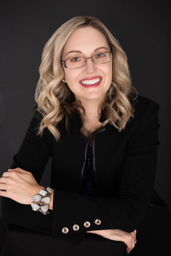

In [ ]:
# get image lists from directory
image_lists = get_image_files(test_img_downloader_path)
img = Image.open(image_lists[0])
img.to_thumb(256,256)

# Downloading all categories images

In [ ]:
data_path = "data"

In [ ]:
# if not os.path.exists(data_path):
#     os.mkdir(data_path)

# for category, search_term in categories.items():
#     dest = os.path.join(data_path, category)
#     if not os.path.exists(dest):
#         os.makedirs(dest)
#     if category == "ship":
#       print(search_term)
#       try:
#         download_images(dest, urls=search_images_ddg(search_term))
#       except Exception as exc:
#         print(exc)
#         pass


passenger ships, large cargo ship transporting containers on a deep blue ocean, side view
'next'


### Downloading Images from Google Search

In [ ]:
if not os.path.exists(data_path):
    os.mkdir(data_path)
data_img_path = os.path.join(os.getcwd(),data_path)
for category, search_term in categories.items():
    dest = os.path.join(data_img_path, category)
    if not os.path.exists(dest):
        os.makedirs(dest)
    crawler = BingImageCrawler(
    downloader_threads=4,
    storage={'root_dir': dest})
    crawler.crawl(
        keyword=search_term,
        max_num=1000,
        file_idx_offset='auto')

ERROR:downloader:Exception caught when downloading file https://www.lensmen.ie/wp-content/uploads/2015/02/Profile-Portrait-Photographer-in-Dublin-Ireland..jpg, error: HTTPSConnectionPool(host='www.lensmen.ie', port=443): Max retries exceeded with url: /wp-content/uploads/2015/02/Profile-Portrait-Photographer-in-Dublin-Ireland..jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7db3a27f20d0>: Failed to resolve 'www.lensmen.ie' ([Errno -2] Name or service not known)")), remaining retry times: 2
ERROR:downloader:Response status code 403, file https://c.pxhere.com/photos/70/d9/woman_white_headshot_blonde_female_face_portrait_complexion-604504.jpg
ERROR:downloader:Response status code 403, file https://format.creatorcdn.com/ad453c25-6ef5-4398-ade6-2084a6c6413d/0/0/0/0,0,2000,2000,1600,2000/0-0-0/7dbfcb6a-5f48-4eeb-b806-92460d43a953/1/1/ottawa+headshot+Kanata+LR.jpg
ERROR:downloader:Response status code 403, file https://format.creatorcdn.com/ad453c25-6ef5-43

In [ ]:
image_counts = get_image_files(data_img_path)
image_counts

(#2915) [Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000001.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000002.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000003.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000004.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000005.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000006.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000007.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000008.jpg'),Path('/content/drive/MyDrive/Object Detection for Security and Autonomous Systems/data/human/000009.jpg'),Path('/content/drive/MyDrive/Object D

In [ ]:
doc(verify_images)

In [ ]:
failed = verify_images(image_counts)
failed

(#0) []

In [ ]:
failed.map(Path.unlink)

(#0) []

# For better detection model, Downloading more human images from google

In [23]:
#search_term = "unprofessional person photos different regions full body"
search_term = "person photos from different cultures and regions"

In [25]:
from icrawler.builtin import GoogleImageCrawler, BingImageCrawler
image_downloader_dir = "image_downloader_dir"
if not os.path.exists(image_downloader_dir):
    os.mkdir(image_downloader_dir)
img_downloader_path = os.path.join(os.getcwd(), image_downloader_dir)
crawler = BingImageCrawler(
    downloader_threads=4,
    storage={'root_dir': img_downloader_path})
crawler.crawl(
    keyword=search_term,
    max_num=1000,
    file_idx_offset=1000)

ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/028/766/402/large_2x/collage-of-portraits-and-faces-of-smiling-multiracial-group-of-various-diverse-people-for-profile-picture-on-colorful-background-diversity-concept-generative-ai-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/025/851/546/large_2x/portrait-collage-of-people-of-different-cultures-and-with-different-emotions-made-with-generative-ai-photo.jpg
ERROR:downloader:Response status code 403, file https://archives1.dailynews.lk/sites/default/files/news/2022/05/20/08-Humanity-01.jpg
ERROR:downloader:Response status code 404, file http://unitedcultures.org/images/cultures/cultures.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/000/466/512/original/vector-national-couples-icons-set.jpg
ERROR:downloader:Response status code 502, file https://img.theculturetrip

In [26]:
image_counts = get_image_files(img_downloader_path)
image_counts

(#717) [Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000279.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000280.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000281.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000282.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000283.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000284.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/image_downloader_dir/000285.jpg'),Path('/content/drive/MyDrive/DS PROJECTS/Object Detection for Security and Autonomous Systems/im

In [27]:
failed = verify_images(image_counts)
failed

(#0) []

In [28]:
failed.map(Path.unlink)

(#0) []